# Modelling Notebook
### Logistic Regression

### Table of Contents
1. [Setting Up Modelling Notebook](#setting-up-modelling-notebook)
    - 1.1 [Imports](#imports)
    - 1.2 [Import pkl file with data](#importing-data)
2. [Addressing Class Imbalance](#2-addressing-class-imbalance)
    - 2.1 [SMOTE](#21-oversampling-smote)
    - 2.2 [Undersampling](#22-undersampling)
3. [Logistic Regression](#3-logistic-regression-further-dive)
    - 3.1 [Gridsearch](#31-gridsearch-with-sampled-data)
    - 3.2 [Model Evaluation](#32-model-evaluation)
    - 3.3 [Feature Importance](#34-features-most-associated-with-each-cancer-type)


# Setting Up Modelling Notebook

#### 1.1 Imports

In [ ]:
# Imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# imblearn
from imblearn.under_sampling import RandomUnderSampler

#collections
from collections import Counter

# seaborn
import seaborn as sns

# SKLEARN
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import precision_recall_curve, average_precision_score
from sklearn.metrics import confusion_matrix, recall_score, precision_score, f1_score, roc_curve, roc_auc_score, precision_recall_curve, average_precision_score, auc

# SMOTE
from imblearn.over_sampling import SMOTE


#### Importing Data

In [14]:
# Import the data frame with our genetic data we will use for modelling
genetic_df = pd.read_csv('genetic_df.csv')
genetic_df.head()

,Unnamed: 0,blockCount,blockSizes,cancer_type,Variant_Classification_3'UTR,Variant_Classification_5'Flank,Variant_Classification_5'UTR,Variant_Classification_Frame_Shift_Del,Variant_Classification_Frame_Shift_Ins,Variant_Classification_IGR,...,Mut_Len_46-54,Mut_Len_55-63,autosome,sex_chromosome,mutation_transition,mutation_transversion,mutation_other,CpG_Site,Variant_Severity,thick_length
0,0,1,1,1,0,0,0,0,0,0,...,0,0,1,0,1,0,0,0,1,1
1,1,1,1,1,0,1,0,0,0,0,...,0,0,1,0,0,0,1,0,3,1
2,2,1,1,0,0,0,0,0,0,0,...,0,0,1,0,1,0,0,0,3,1
3,3,1,1,1,0,0,0,0,0,0,...,0,0,1,0,0,1,0,0,3,1
4,4,1,1,0,0,0,1,0,0,0,...,0,0,1,0,0,1,0,0,3,1


In [15]:
X = genetic_df.drop(columns=['cancer_type'])
y = genetic_df['cancer_type']

In [16]:
# train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, stratify = y, random_state = 1)

In [17]:
# instantiate and fit
logreg = LogisticRegression(random_state=1).fit(X_train, y_train)

/Applications/anaconda3/envs/capstone_env/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [18]:
# predict classification
y_test_pred = logreg.predict(X_test)

print('------------------------------------------')

# confusion matrix
conmat = pd.DataFrame(
    data = confusion_matrix(y_test, y_test_pred),
    index = ['true 0', 'true 1'],
    columns = ['predicted 0', 'predicted 1']
)
display(conmat)

print('------------------------------------------')

print(f'Accuracy score: {logreg.score(X_test, y_test)*100:0.1f}%')
print(f'Recall score: {recall_score(y_test, y_test_pred)*100:0.1f}%')
print(f'Precision score: {precision_score(y_test, y_test_pred)*100:0.1f}%')
print(f'F1 score: {f1_score(y_test, y_test_pred):0.2f}')

print('------------------------------------------')

------------------------------------------


,predicted 0,predicted 1
true 0,20,7091
true 1,13,16541


------------------------------------------
Accuracy score: 70.0%
Recall score: 99.9%
Precision score: 70.0%
F1 score: 0.82
------------------------------------------


# 2. Addressing Class Imbalance

## 2.1 Oversampling (SMOTE)

In [19]:
# STEP 1: Instantiate SMOTE sampler, fit it to the training data, then resample the data

# Instantiate
smote = SMOTE(random_state=1)

# Resample
X_train_sm, y_train_sm = smote.fit_resample(X_train, y_train)

# Check what SMOTE has done
print('Original class distribution')
display(pd.Series(y_train).value_counts().sort_index())

print('\nResampled class distribution')
display(pd.Series(y_train_sm).value_counts().sort_index())

/Applications/anaconda3/envs/capstone_env/lib/python3.9/site-packages/sklearn/base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation.validate_data` instead. This function becomes public and is part of the scikit-learn developer API.
  warnings.warn(


Original class distribution


cancer_type
0    28445
1    66211
Name: count, dtype: int64


Resampled class distribution


cancer_type
0    66211
1    66211
Name: count, dtype: int64

In [20]:
# STEP 3: Instantiate and fit to scaled & sampled training data
logreg_sm = LogisticRegression(random_state=1, max_iter=15000).fit(X_train_sm, y_train_sm)

In [21]:
# STEP 4: Make predictions & evaluate 

# predict classification
y_test_pred=logreg_sm.predict(X_test)

# confusion matrix
conmat_smote=pd.DataFrame(
    data=confusion_matrix(y_test, y_test_pred),
    index=['true 0','true 1'],
    columns=['predicted 0','predicted 1']
)
display(conmat_smote)

print(f'Accuracy score: {logreg_sm.score(X_test,y_test)*100:0.1f}%')
print(f'Recall score: {recall_score(y_test,y_test_pred)*100:0.1f}%')
print(f'Precision score: {precision_score(y_test,y_test_pred)*100:0.1f}%')
print(f'F1 score: {f1_score(y_test,y_test_pred)*100:0.1f}%')

,predicted 0,predicted 1
true 0,203,6908
true 1,226,16328


Accuracy score: 69.9%
Recall score: 98.6%
Precision score: 70.3%
F1 score: 82.1%


In [22]:
print('Unsampled:')
display(conmat)
print('SMOTE-sampled data:')
display(conmat_smote)

Unsampled:


,predicted 0,predicted 1
true 0,20,7091
true 1,13,16541


SMOTE-sampled data:


,predicted 0,predicted 1
true 0,203,6908
true 1,226,16328


## 2.2 Undersampling

In [23]:
# Instantiate the RandomUnderSampler
rus = RandomUnderSampler(random_state=42)

In [24]:
# STEP 1: Instantiate RandomUnderSampler, fit it to the training data, then resample the data

# Instantiate
rus = RandomUnderSampler(random_state=42)

# Resample
X_train_rus, y_train_rus = rus.fit_resample(X_train, y_train)

# Check what RandomUnderSampler has done
print('Original class distribution')
display(pd.Series(y_train).value_counts().sort_index())

print('\nResampled class distribution')
display(pd.Series(y_train_rus).value_counts().sort_index())

Original class distribution


/Applications/anaconda3/envs/capstone_env/lib/python3.9/site-packages/sklearn/base.py:484: FutureWarning: `BaseEstimator._check_n_features` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation._check_n_features` instead.
  warnings.warn(
/Applications/anaconda3/envs/capstone_env/lib/python3.9/site-packages/sklearn/base.py:493: FutureWarning: `BaseEstimator._check_feature_names` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation._check_feature_names` instead.
  warnings.warn(


cancer_type
0    28445
1    66211
Name: count, dtype: int64


Resampled class distribution


cancer_type
0    28445
1    28445
Name: count, dtype: int64

In [25]:
# STEP 3: Instantiate and fit to scaled & sampled training data
logreg_rus = LogisticRegression(random_state=1, max_iter=15000).fit(X_train_rus, y_train_rus)

In [26]:
# STEP 4: Make predictions & evaluate 

# predict classification
y_test_pred=logreg_rus.predict(X_test)

# confusion matrix
conmat_rus=pd.DataFrame(
    data=confusion_matrix(y_test, y_test_pred),
    index=['true 0','true 1'],
    columns=['predicted 0','predicted 1']
)
display(conmat_rus)

print(f'Accuracy score: {logreg_rus.score(X_test,y_test)*100:0.1f}%')
print(f'Recall score: {recall_score(y_test,y_test_pred)*100:0.1f}%')
print(f'Precision score: {precision_score(y_test,y_test_pred)*100:0.1f}%')
print(f'F1 score: {f1_score(y_test,y_test_pred)*100:0.1f}%')

,predicted 0,predicted 1
true 0,3073,4038
true 1,5546,11008


Accuracy score: 59.5%
Recall score: 66.5%
Precision score: 73.2%
F1 score: 69.7%


In [27]:
print('Unsampled:')
display(conmat)
print('SMOTE-sampled data:')
display(conmat_smote)
print('RUS-sampled data:')
display(conmat_rus)

Unsampled:


,predicted 0,predicted 1
true 0,20,7091
true 1,13,16541


SMOTE-sampled data:


,predicted 0,predicted 1
true 0,203,6908
true 1,226,16328


RUS-sampled data:


,predicted 0,predicted 1
true 0,3073,4038
true 1,5546,11008


# 3. Logistic Regression Further Dive

## 3.1 Gridsearch With Sampled Data

In [ ]:
from sklearn.decomposition import PCA
from tempfile import mkdtemp
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.pipeline import make_pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression


cachedir = mkdtemp()

estimators = [('normalise', StandardScaler()),
              ('PCA_model', PCA()),
              ('model', LogisticRegression())]

pipe = Pipeline(estimators, memory = cachedir,
                verbose = True)

param_grid = [
            {'model': [LogisticRegression()], 
             'pca__n_components': [5, 10, 15, 20],
             'normalise': [StandardScaler(), None],
             'model__penalty': ['l1', 'l2'],
             'model__solver': ['saga', 'liblinear'],
             'model__C': [0.001, 0.01, 0.1, 1, 10, 15]}]

grid = GridSearchCV(pipe, param_grid, cv=5, verbose=1)
fittedgrid = grid.fit(X_train_sm, y_train_sm)

In [31]:
# Show the best parameters from the pipeline
fittedgrid.best_params_

{'PCA_model__n_components': 20,
 'model': LogisticRegression(),
 'model__C': 15,
 'model__penalty': 'l1',
 'model__solver': 'liblinear',
 'normalise': None}

In [33]:
# Instantiate the model
logreg_model = LogisticRegression(C=15, penalty='l1', solver='liblinear')
logreg_model.fit(X_train_sm, y_train_sm)

/Applications/anaconda3/envs/capstone_env/lib/python3.9/site-packages/sklearn/svm/_base.py:1249: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


LogisticRegression(C=15, penalty='l1', solver='liblinear')

## 3.2 Model Evaluation

In [35]:
# Make predictions on the test set
y_pred_lr = logreg_model.predict(X_test)
y_prob_lr = logreg_model.predict_proba(X_test)[:, 1]

In [39]:
# Generate confusion matrix
cf_matrix = confusion_matrix(y_test, y_pred_lr)

cf_matrix

# Label rows and columns
cf_df = pd.DataFrame(
    cf_matrix,
    columns=["Predicted LGG", "Predicted GBM"],
    index=["True LGG", "True GBM"],
)
cf_df

,Predicted LGG,Predicted GBM
True LGG,294,6817
True GBM,353,16201


In [40]:
from sklearn.metrics import accuracy_score, classification_report, precision_score, recall_score

# Accuracy and Classification Report


classification_report_str = classification_report(y_test, y_pred_lr)
print(f"Classification Report: {classification_report_str}")

Classification Report:               precision    recall  f1-score   support

           0       0.45      0.04      0.08      7111
           1       0.70      0.98      0.82     16554

    accuracy                           0.70     23665
   macro avg       0.58      0.51      0.45     23665
weighted avg       0.63      0.70      0.60     23665



In [41]:
accuracy = accuracy_score(y_test, y_pred_lr)
recall = recall_score(y_test, y_pred_lr)
precision = precision_score(y_test, y_pred_lr)

print(f"Accuracy: {accuracy}")
print(f"Recall: {recall}")
print(f"Precision: {precision}")

Accuracy: 0.6970209169659836
Recall: 0.9786758487374653
Precision: 0.7038404726735599


In [43]:
# f1 score
f1 = f1_score(y_test, y_pred_lr)
print(f"F1 Score: {f1}")

F1 Score: 0.8188112807035277


In [44]:
# log loss
from sklearn.metrics import log_loss
log_loss_value = log_loss(y_test, y_prob_lr)
print(f"Log Loss: {log_loss_value}")

Log Loss: 0.612907268352466


## Visuals for Model Evaluation

ROC AUC: 0.5661140919987984


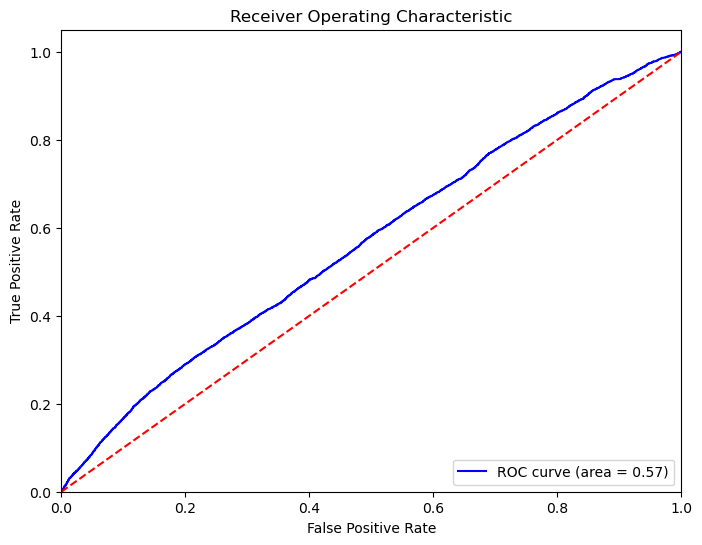

Average Precision: 0.7497684628294057


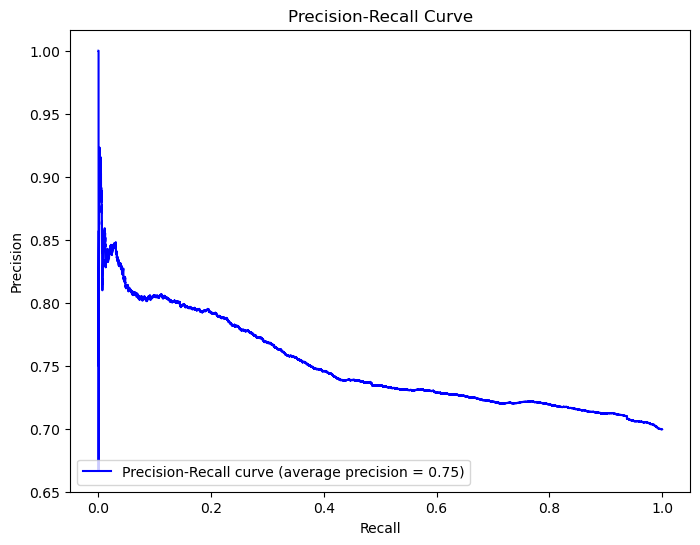

Feature ranking:
1. Variant_Classification_IGR (9.218162522383219)
2. Mut_Len_55-63 (8.856567783729941)
3. mutation_transversion (7.892683634963254)
4. mutation_other (7.293351514101902)
5. mutation_transition (7.089649417533348)
6. Variant_Classification_Silent (6.607103029376881)
7. Variant_Classification_In_Frame_Del (5.138854680915321)
8. Variant_Classification_In_Frame_Ins (5.088442102536153)
9. Variant_Classification_Intron (4.864352145236766)
10. Mut_Len_46-54 (4.746003826150726)
11. Variant_Classification_Missense_Mutation (4.438091533420915)
12. Variant_Classification_Nonstop_Mutation (3.525204777412843)
13. Variant_Classification_3'UTR (2.97591017073075)
14. Variant_Classification_5'UTR (2.963936625823488)
15. Variant_Classification_Splice_Region (2.8968707188418836)
16. Variant_Classification_5'Flank (2.7889273335600087)
17. Variant_Classification_RNA (2.569517656760022)
18. Variant_Classification_Splice_Site (2.468470545611462)
19. Variant_Severity (1.9909323789653077)
20. 

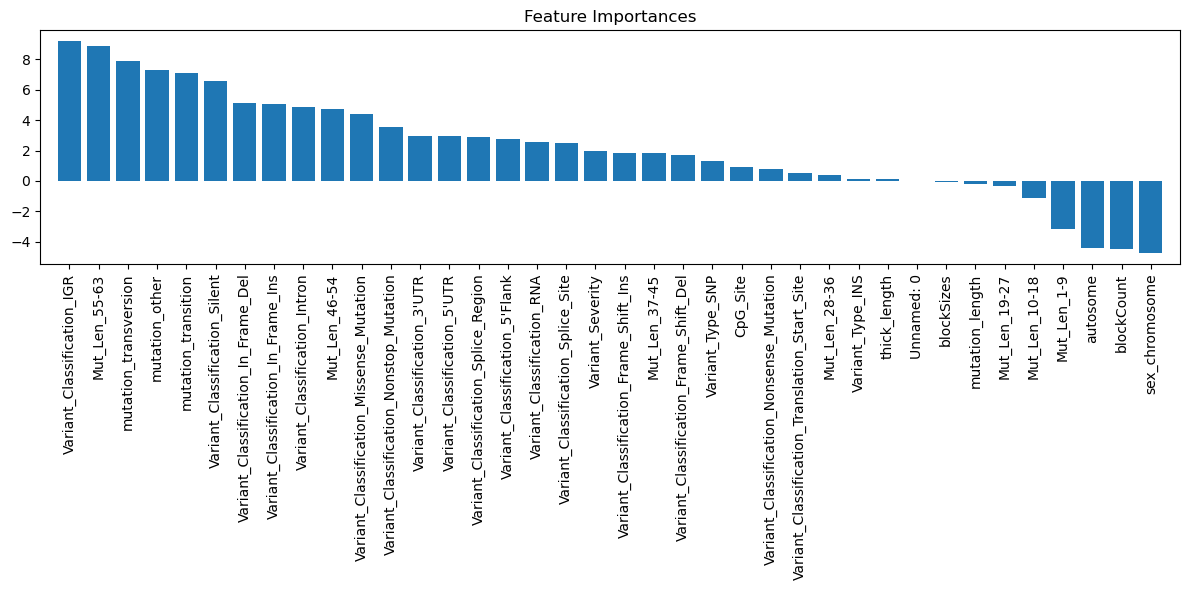

In [ ]:
# ROC curve
from sklearn.metrics import roc_curve, roc_auc_score
# Compute ROC curve and ROC area
fpr, tpr, thresholds = roc_curve(y_test, y_prob_lr)
roc_auc = roc_auc_score(y_test, y_prob_lr)
print(f"ROC AUC: {roc_auc}")
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='red', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
plt.legend(loc='lower right')
plt.show()

#Precisisoin-Recall Curve 
precision, recall, _ = precision_recall_curve(y_test, y_prob_lr)
average_precision = average_precision_score(y_test, y_prob_lr)
print(f"Average Precision: {average_precision}")
plt.figure(figsize=(8, 6))
plt.plot(recall, precision, color='blue', label=f'Precision-Recall curve (average precision = {average_precision:.2f})')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend(loc='lower left')
plt.show()
# Feature importance
importances = logreg_model.coef_[0]
feature_names = X.columns
indices = np.argsort(importances)[::-1]



## 3.3 Features most associated with each cancer type

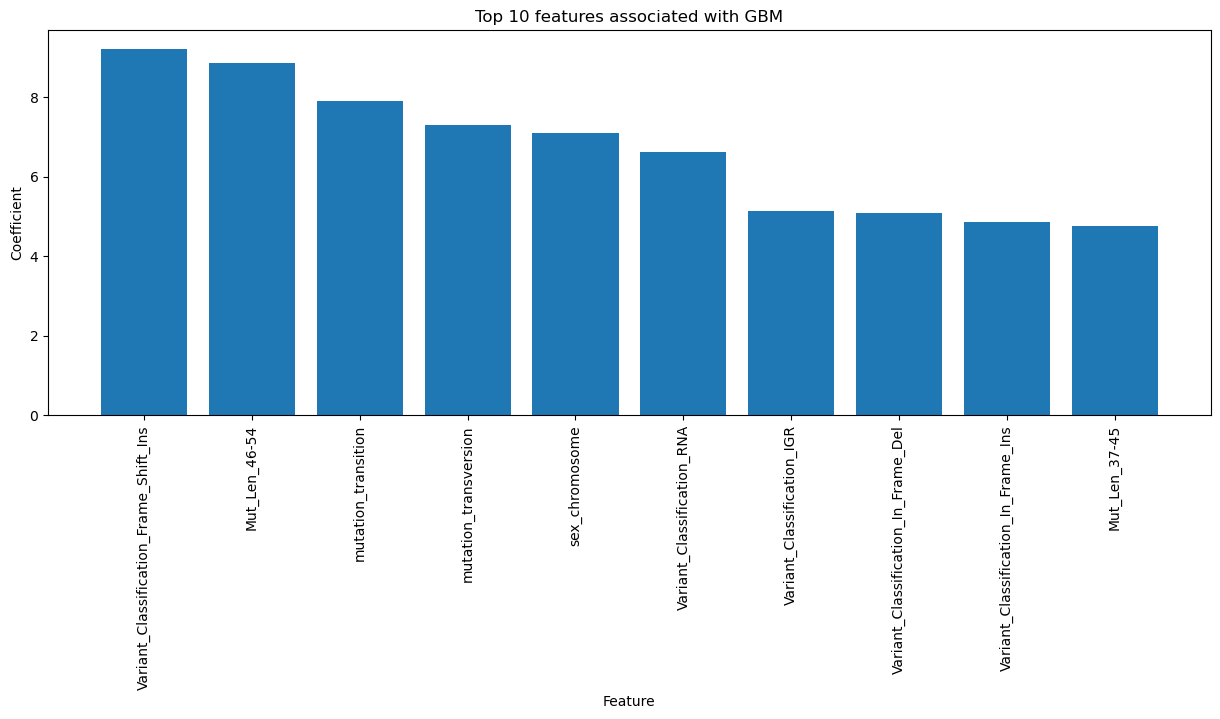

In [38]:
# find what words are most predictive of a GBM diagnosis

pos_coef = logreg_model.coef_[0]
# names of coefficients (words)
GBM_features = genetic_df.columns[:len(pos_coef)]

# Create a series of the coefficients and feature names
GBM_feature_count = pd.Series(pos_coef, index=GBM_features).sort_values(ascending=False)

# Plot the 10 most common features associated with GBM
# make the plot vertical
plt.figure(figsize=(15, 5))
plt.xticks(rotation=90)
# plot the top 10 features
plt.bar(GBM_feature_count.head(10).index, GBM_feature_count.head(10).values)
# add labels
plt.title("Top 10 features associated with GBM")
plt.ylabel("Coefficient")
plt.xlabel("Feature")
plt.show()

#GBM_feature_count.head(10).plot(kind="bar", figsize=(15, 5), legend=False)
#plt.title("Top 10 features associated with GBM")
#plt.ylabel("Coefficient")
#plt.xlabel("Feature")
#plt.show()